In [1]:

from sklearn import tree
from sklearn.tree import export_graphviz
import numpy as np

In [2]:

data = np.array([[0, 0, 1, 0, 0],
                [1, 0, 2, 0, 0],
                [0, 1, 2, 0, 1],
                [2, 1, 0, 2, 1],
                [0, 1, 0, 1, 1],
                [1, 1, 1, 2, 0],
                [1, 1, 0, 2, 0],
                [0, 0, 2, 1, 0]])      

x = data[:,0:4]
y = data[:,4]
print(x, '\n')
print(y)

[[0 0 1 0]
 [1 0 2 0]
 [0 1 2 0]
 [2 1 0 2]
 [0 1 0 1]
 [1 1 1 2]
 [1 1 0 2]
 [0 0 2 1]] 

[0 0 1 1 1 0 0 0]


In [3]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [4]:
import os, sys


PATH = 'graphviz-2.38\\release\\bin'
os.environ["PATH"] = os.pathsep+PATH

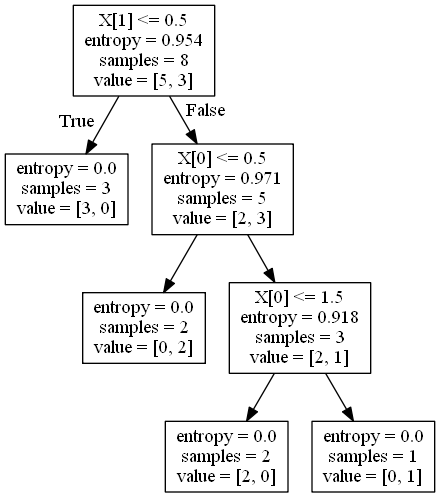

In [5]:
dot_data = export_graphviz(clf)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

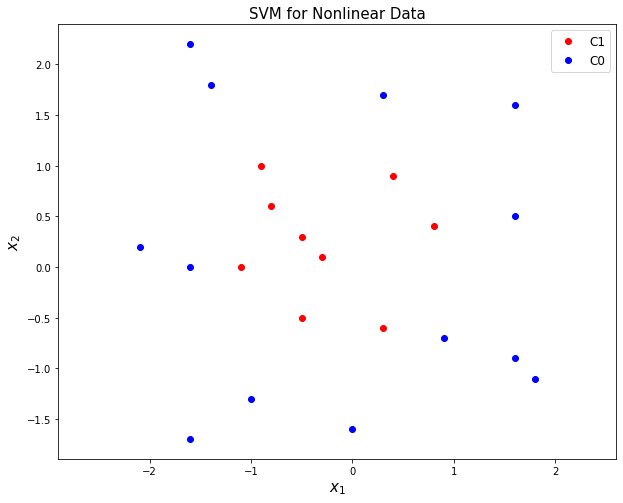

In [4]:
import matplotlib.pyplot as plt
X1 = np.array([[-1.1,0],[-0.3,0.1],[-0.9,1],[0.8,0.4],[0.4,0.9],[0.3,-0.6],
               [-0.5,0.3],[-0.8,0.6],[-0.5,-0.5]])
     
X0 = np.array([[-1,-1.3], [-1.6,2.2],[0.9,-0.7],[1.6,0.5],[1.8,-1.1],[1.6,1.6],
               [-1.6,-1.7],[-1.4,1.8],[1.6,-0.9],[0,-1.6],[0.3,1.7],[-1.6,0],[-2.1,0.2]])

X1 = np.asmatrix(X1)
X0 = np.asmatrix(X0)

plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('SVM for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.axis('equal')
plt.show()

In [5]:
x=np.vstack([X0,X1])
y=np.vstack([np.zeros((X0.shape[0],1)),np.ones((X1.shape[0],1))])

In [6]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
[x1gr,x2gr]=np.meshgrid(np.arange(-3,3,0.01),np.arange(-3,3,0.01))
xp=np.hstack([x1gr.reshape(-1,1),x2gr.reshape(-1,1)])
xp=np.asmatrix(xp)

In [8]:
pred=clf.predict(xp)
pred_cls=np.where(pred==1)[0]

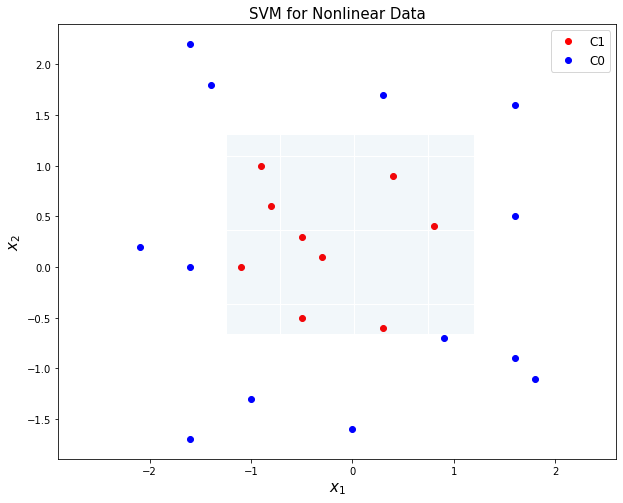

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(X1[:,0], X1[:,1], 'ro', label = 'C1')
plt.plot(X0[:,0], X0[:,1], 'bo', label = 'C0')
plt.title('SVM for Nonlinear Data', fontsize = 15)
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.legend(loc = 1, fontsize = 12)
plt.plot(xp[pred_cls,0],xp[pred_cls,1],'s',markersize=0.05,alpha=0.3)
plt.axis('equal')
plt.show()

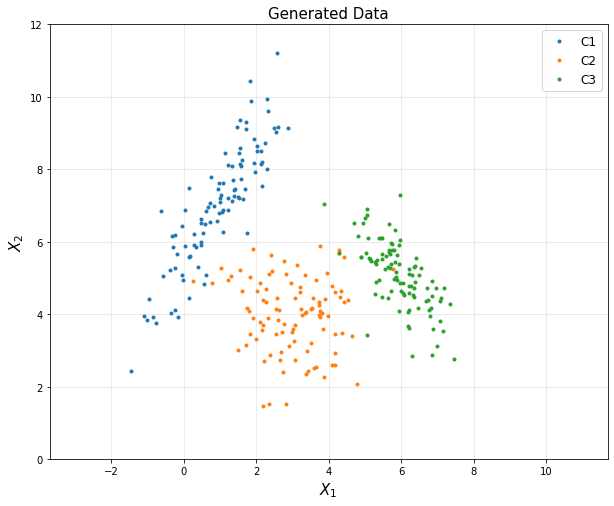

In [16]:
mu1 = np.array([1, 7])
mu2 = np.array([3, 4])
mu3 = np.array([6, 5])

SIGMA1 = 0.8*np.array([[1, 1.5],
                       [1.5, 3]])
SIGMA2 = 0.5*np.array([[2, 0],
                       [0, 2]])
SIGMA3 = 0.5*np.array([[1, -1],
                       [-1, 2]])

X1 = np.random.multivariate_normal(mu1, SIGMA1, 100)
X2 = np.random.multivariate_normal(mu2, SIGMA2, 100)
X3 = np.random.multivariate_normal(mu3, SIGMA3, 100)

y1 = 1*np.ones([100,1])
y2 = 2*np.ones([100,1])
y3 = 3*np.ones([100,1])

plt.figure(figsize = (10, 8))
plt.title('Generated Data', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [17]:
x=np.vstack([X1,X2,X3])
y=np.vstack([y1,y2,y3])

In [30]:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf.fit(x,y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

C:\Users\hjhjpark\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


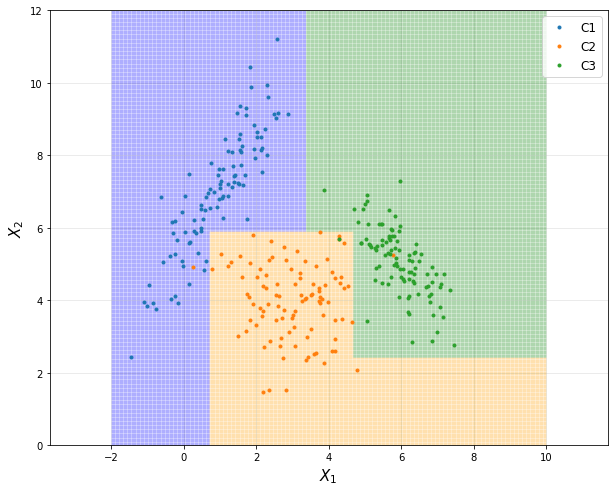

In [32]:
x1gr,x2gr=np.meshgrid(np.arange(-2,10,0.01),np.arange(0,12,0.01))
xp=np.hstack([x1gr.reshape(-1,1),x2gr.reshape(-1,1)])
pred=clf.predict(xp)
pred_cls1=np.where(pred==1)[0]
pred_cls2=np.where(pred==2)[0]
pred_cls3=np.where(pred==3)[0]

plt.figure(figsize = (10, 8))
plt.plot(xp[pred_cls1,0], xp[pred_cls1,1], 's', color = 'blue', markersize = 0.1, alpha = 0.1)
plt.plot(xp[pred_cls2,0], xp[pred_cls2,1], 's', color = 'orange', markersize = 0.1, alpha = 0.1)
plt.plot(xp[pred_cls3,0], xp[pred_cls3,1], 's', color = 'green', markersize = 0.1, alpha = 0.1)
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()

In [36]:

from sklearn import ensemble

clf = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 3, random_state= 0)
print(x.shape)
print(y.shape)
clf.fit(x,np.ravel(y))

(300, 2)
(300, 1)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

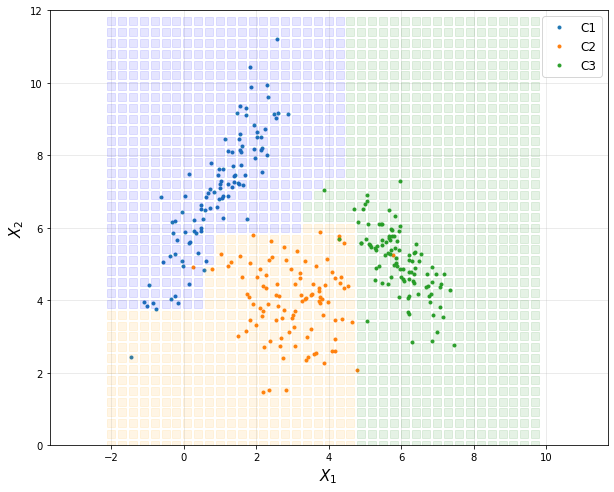

In [37]:
res = 0.3
[X1gr, X2gr] = np.meshgrid(np.arange(-2,10,res), np.arange(0,12,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

q = clf.predict(Xp)
q = np.asmatrix(q).reshape(-1,1)

C1 = np.where(q == 1)[0]
C2 = np.where(q == 2)[0]
C3 = np.where(q == 3)[0]

plt.figure(figsize = (10, 8))
plt.plot(X1[:,0], X1[:,1], '.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], '.', label = 'C2')
plt.plot(X3[:,0], X3[:,1], '.', label = 'C3')
plt.plot(Xp[C1,0], Xp[C1,1], 's', color = 'blue', markersize = 8, alpha = 0.1)
plt.plot(Xp[C2,0], Xp[C2,1], 's', color = 'orange', markersize = 8, alpha = 0.1)
plt.plot(Xp[C3,0], Xp[C3,1], 's', color = 'green', markersize = 8, alpha = 0.1)
plt.xlabel('$X_1$', fontsize = 15)
plt.ylabel('$X_2$', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.axis([-2, 10, 0, 12])
plt.show()